In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# File to Load (Remember to change these)

city_data = os.path.join('C:/Users/user/Desktop/UNCCCLT201905DATA4/02-Homework/05-Matplotlib/Instructions/Pyber/data', 'city_data.csv')
ride_data = os.path.join('C:/Users/user/Desktop/UNCCCLT201905DATA4/02-Homework/05-Matplotlib/Instructions/Pyber/data', 'ride_data.csv')




In [2]:
#city_data_df = city_data_df.drop_duplicates('city', keep = 'first')

In [3]:
#file = ("data", "city_data.csv")
city_data_df = pd.read_csv(city_data)
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#file data ride data
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
#merge
merged_df = city_data_df.merge(ride_data_df, on = 'city')
merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
#city 
city = merged_df.groupby('city')


In [7]:
# Avgerage 
avg_fare = city.mean()['fare']
ride_count = city['ride_id'].count()
# driver_count
driver_count = city.mean()['driver_count']

city_type = city_data_df.set_index('city')['type']

city_data = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})
city_data.sort_values('Number of Drivers', ascending = False)

,Number of Rides,Average Fare,Number of Drivers,Type of City
West Samuelburgh,25,21.767600,73.0,Urban
South Michelleport,31,24.451613,72.0,Urban
West Anthony,30,24.736667,70.0,Urban
Liumouth,33,26.150000,69.0,Urban
Port Angela,19,23.836842,67.0,Urban
Reynoldsfurt,19,21.919474,67.0,Urban
East Kaylahaven,29,23.757931,65.0,Urban
Royland,30,20.570667,64.0,Urban
Jerryton,25,25.649200,64.0,Urban
Grahamburgh,25,25.221200,61.0,Urban


In [8]:
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

In [9]:
#city categories
rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Data')

Text(0.5, 0.98, 'Pyber Ride Data')

<Figure size 432x288 with 0 Axes>

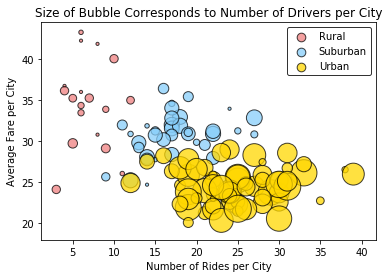

In [10]:
# Bubble Plot of Ride Sharing Data
# scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]


#save fig
plt.savefig("pyber_bubble_plot.jpeg")

In [11]:
plt.show()

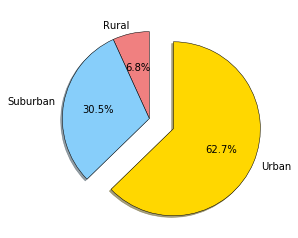

In [12]:
# Obtain the x and y coordinates for each of the three city types

#pie charts
city_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum =  city_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
# Save Figure
plt.savefig("city_type_plot.jpeg")

In [13]:
plt.show()

## Total Fares by City Type

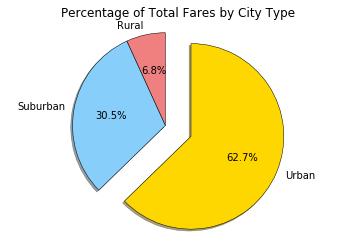

<Figure size 432x288 with 0 Axes>

In [14]:
fare_sum =  city_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('Percentage of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("total_fares_plot.jpeg")

In [15]:
# Show Figure
plt.show()

## Total Rides by City Type

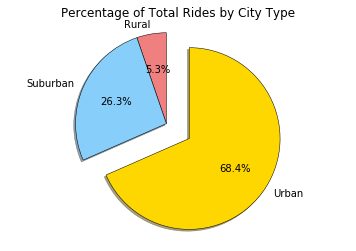

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate Ride Percents
ride_sum = city_type.count()['ride_id']
# Build Pie Chart
labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Rides by City Type')
plt.axis('equal')
plt.show()
# Save Figure
plt.savefig("total_rides_plot.jpeg")

In [17]:
# Show Figure
plt.show()

## Total Drivers by City Type

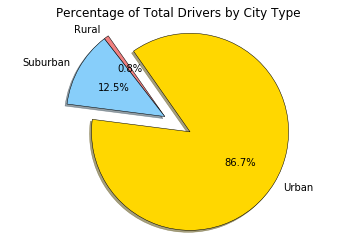

<Figure size 432x288 with 0 Axes>

In [18]:
# Calculate Driver Percents
driver_sum = city_type.sum()['driver_count']
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Drivers by City Type')
plt.axis('equal')
plt.show()
plt.savefig("total_drivers_plot.jpeg")

In [19]:
# Show Figure
plt.show()